In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv("train.csv")
#test=pd.read_csv("test.csv")

In [3]:
data.head()

,Id,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,30,0,Non-Travel,Research & Development,2,3,Medical,571,3,...,3,0,12,2,11,7,6,7,4,1
1,2,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,...,3,2,7,2,3,2,1,1,2,1
2,3,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,...,3,0,12,3,9,7,7,3,5,1
3,4,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,...,3,0,18,2,7,7,1,7,4,1
4,5,37,0,Travel_Rarely,Research & Development,3,3,Other,689,3,...,3,1,10,2,10,7,7,8,1,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1628 entries, 0 to 1627
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Id                       1628 non-null   int64 
 1   Age                      1628 non-null   int64 
 2   Attrition                1628 non-null   int64 
 3   BusinessTravel           1628 non-null   object
 4   Department               1628 non-null   object
 5   DistanceFromHome         1628 non-null   int64 
 6   Education                1628 non-null   int64 
 7   EducationField           1628 non-null   object
 8   EmployeeNumber           1628 non-null   int64 
 9   EnvironmentSatisfaction  1628 non-null   int64 
 10  Gender                   1628 non-null   object
 11  JobInvolvement           1628 non-null   int64 
 12  JobRole                  1628 non-null   object
 13  JobSatisfaction          1628 non-null   int64 
 14  MaritalStatus            1628 non-null  

In [5]:
print(data.shape)

(1628, 29)


In [6]:
HR = data.copy()

In [7]:
HR.columns

Index(['Id', 'Age', 'Attrition', 'BusinessTravel', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'CommunicationSkill',
       'Behaviour'],
      dtype='object')

In [8]:
HR.columns.to_series().groupby(HR.dtypes).groups

{dtype('int64'): Index(['Id', 'Age', 'Attrition', 'DistanceFromHome', 'Education',
        'EmployeeNumber', 'EnvironmentSatisfaction', 'JobInvolvement',
        'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked',
        'PercentSalaryHike', 'PerformanceRating', 'StockOptionLevel',
        'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
        'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
        'CommunicationSkill', 'Behaviour'],
       dtype='object'),
 dtype('O'): Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
        'MaritalStatus', 'OverTime'],
       dtype='object')}

<function matplotlib.pyplot.show(*args, **kw)>

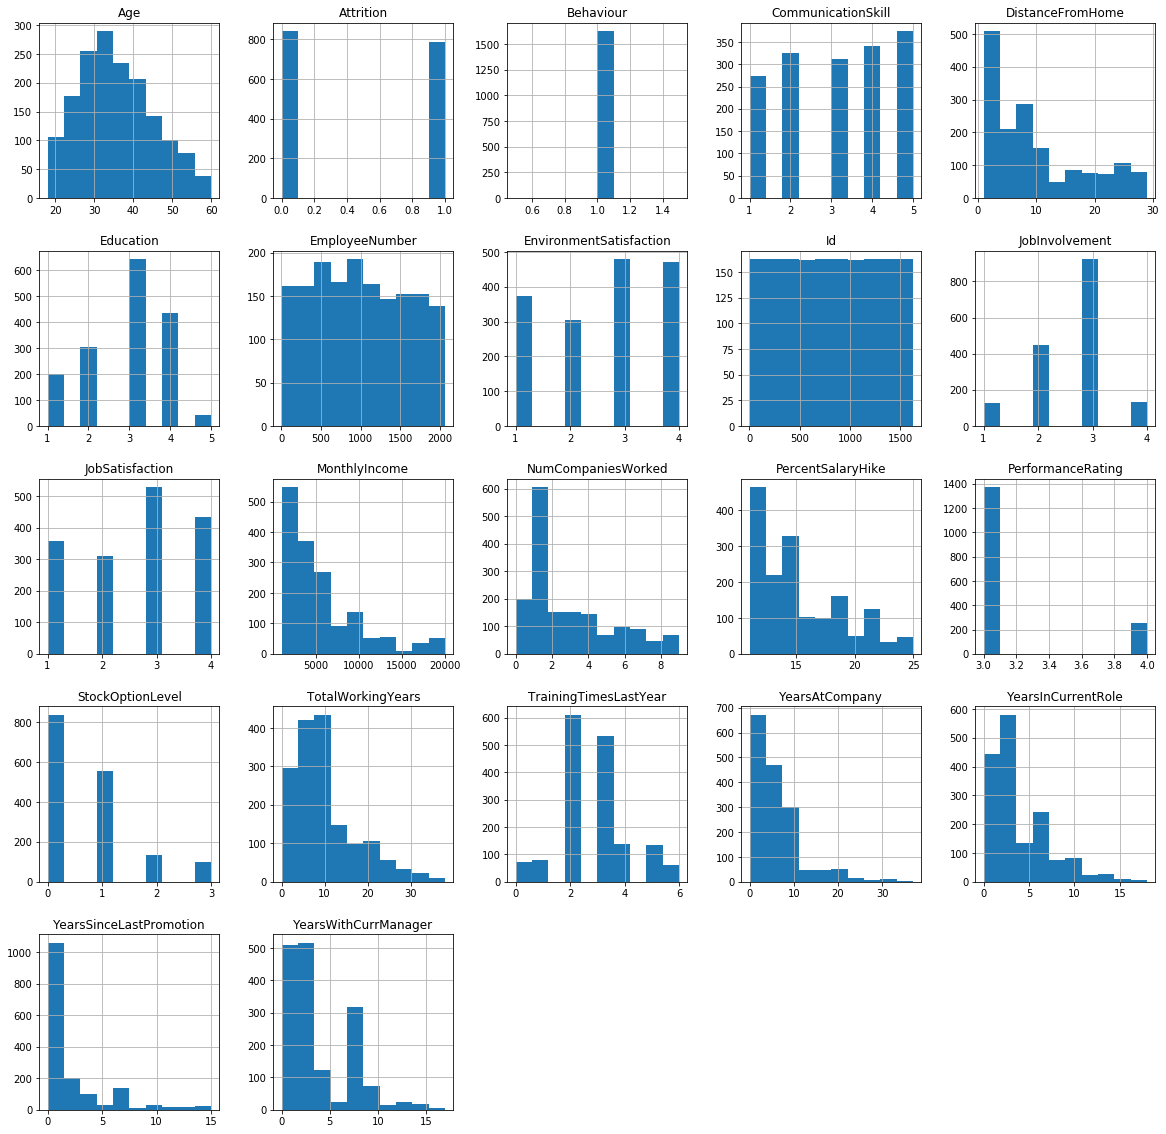

In [9]:
HR.hist(figsize=(20,20))
plt.show

In [10]:
from scipy.stats import norm, skew
import seaborn as sns

In [11]:
(mu,sigma) = norm.fit(HR.loc[HR['Attrition']==1,'Age'])
print('Ex-employee: Average age = {:.1f} years old and Standard Deviation = {:.1f}'.format(mu,sigma))
(mu,sigma) = norm.fit(HR.loc[HR['Attrition']==0,'Age'])
print('Current Employee: Average age = {:.1f} years old and Standard Deviation = {:.1f}'.format(mu,sigma))

Ex-employee: Average age = 33.7 years old and Standard Deviation = 9.7
Current Employee: Average age = 37.5 years old and Standard Deviation = 8.9


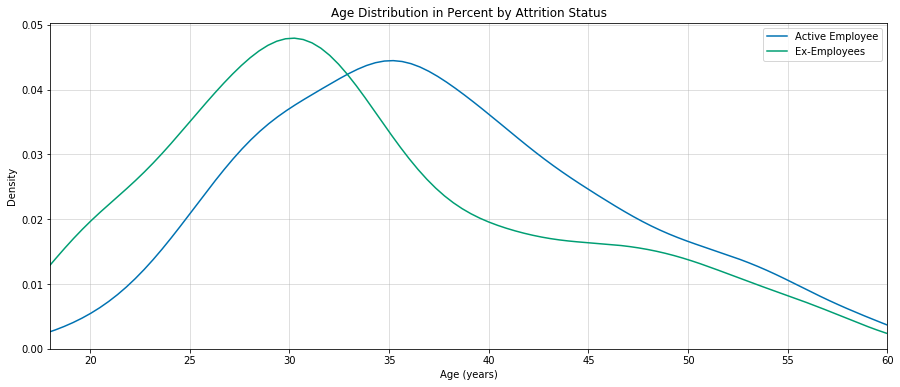

In [12]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(HR.loc[HR['Attrition'] == 0, 'Age'], label = 'Active Employee')
sns.kdeplot(HR.loc[HR['Attrition'] == 1, 'Age'], label = 'Ex-Employees')
plt.xlim(left=18, right=60)
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.title('Age Distribution in Percent by Attrition Status');

In [13]:
HR['EducationField'].value_counts()

Life Sciences       623
Medical             521
Marketing           197
Technical Degree    162
Other                85
Human Resources      40
Name: EducationField, dtype: int64

In [14]:
HR['Gender'].value_counts()

Male      996
Female    632
Name: Gender, dtype: int64

In [15]:
print("Normalised gender distribution of ex-employees in the dataset: Male = {:.1f}%; Female {:.1f}%.".format((HR[(HR['Attrition'] == 1) & (
    HR['Gender'] == 'Male')].shape[0] / HR[HR['Gender'] == 'Male'].shape[0])*100, (HR[(HR['Attrition'] == 1) & (HR['Gender'] == 'Female')].shape[0] / HR[HR['Gender'] == 'Female'].shape[0])*100))

Normalised gender distribution of ex-employees in the dataset: Male = 49.2%; Female 46.7%.


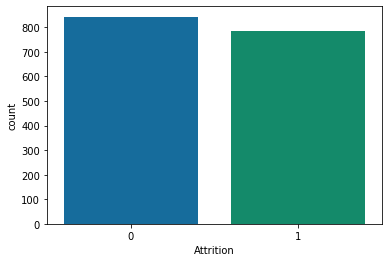

In [16]:
sns.countplot(data['Attrition'])

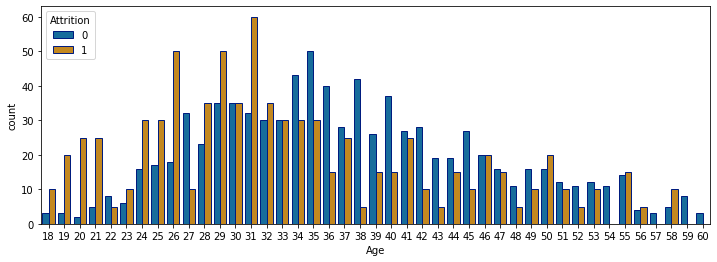

In [17]:
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)

#ax = axis
sns.countplot(x='Age', hue='Attrition', data = data, palette="colorblind", ax = ax,  edgecolor=sns.color_palette("dark", n_colors = 1));

In [18]:
for column in data.columns:
    if data[column].dtype==np.int64:
        print(str(column) + ' : ' + str(data[column].unique()))
        print(data[column].value_counts())
        print("_________________________________________________________________")

Id : [   1    2    3 ... 1626 1627 1628]
1627    1
1092    1
1072    1
1074    1
1076    1
       ..
549     1
551     1
553     1
555     1
2       1
Name: Id, Length: 1628, dtype: int64
_________________________________________________________________
Age : [30 36 55 39 37 31 32 33 35 21 60 29 40 34 41 38 45 44 26 54 23 50 46 42
 43 28 25 47 51 48 49 27 59 58 53 57 52 24 20 18 19 56 22]
31    92
29    85
35    80
34    73
30    70
26    68
32    65
33    60
28    58
36    55
37    53
40    52
41    52
25    47
38    47
24    46
27    42
39    41
46    40
42    38
45    37
50    36
44    34
47    31
21    30
55    29
20    27
49    26
43    24
19    23
51    22
53    22
48    16
52    16
23    16
58    15
22    13
18    13
54    11
56     9
59     8
57     3
60     3
Name: Age, dtype: int64
_________________________________________________________________
Attrition : [0 1]
0    843
1    785
Name: Attrition, dtype: int64
_________________________________________________________________

In [19]:
data = data.drop('EmployeeNumber', axis=1)

In [20]:
data.corr()

,Id,Age,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
Id,1.000000,-0.156452,0.694838,0.072305,-0.035610,-0.100908,-0.127778,-0.105379,-0.178736,0.008325,...,0.022698,-0.118617,-0.193855,-0.080326,-0.156880,-0.183577,-0.039062,-0.164596,0.083742,NaN
Age,-0.156452,1.000000,-0.200596,0.020658,0.219237,0.001950,0.073185,0.037604,0.509210,0.312099,...,0.002982,0.126257,0.675578,0.004789,0.355438,0.266728,0.222113,0.263792,0.019341,NaN
Attrition,0.694838,-0.200596,1.000000,0.109224,-0.041390,-0.111746,-0.159710,-0.148012,-0.240479,0.034763,...,0.010202,-0.175496,-0.262922,-0.105663,-0.230061,-0.269408,-0.050379,-0.222752,0.103379,NaN
DistanceFromHome,0.072305,0.020658,0.109224,1.000000,0.023945,-0.046390,0.016316,-0.097558,0.012521,-0.048131,...,0.071457,0.029378,0.029289,-0.032038,-0.030392,-0.010607,0.004460,-0.004135,-0.036109,NaN
Education,-0.035610,0.219237,-0.041390,0.023945,1.000000,-0.065041,0.083673,-0.036143,0.119907,0.091690,...,-0.036204,0.042585,0.175662,-0.043272,0.145911,0.076579,0.076430,0.121981,0.000223,NaN
EnvironmentSatisfaction,-0.100908,0.001950,-0.111746,-0.046390,-0.065041,1.000000,-0.000977,0.035033,-0.033990,-0.051681,...,-0.041427,-0.006479,-0.019005,0.020531,0.000685,0.008028,0.014325,0.002457,-0.011557,NaN
JobInvolvement,-0.127778,0.073185,-0.159710,0.016316,0.083673,-0.000977,1.000000,-0.005453,0.005859,0.012240,...,-0.063512,0.061673,0.037145,-0.027122,-0.008208,0.029460,0.006373,0.062552,0.052877,NaN
JobSatisfaction,-0.105379,0.037604,-0.148012,-0.097558,-0.036143,0.035033,-0.005453,1.000000,0.003255,-0.032738,...,-0.078554,0.024867,0.012892,-0.012757,0.023714,0.036065,0.004439,-0.006131,-0.051464,NaN
MonthlyIncome,-0.178736,0.509210,-0.240479,0.012521,0.119907,-0.033990,0.005859,0.003255,1.000000,0.169025,...,-0.037533,0.012281,0.759658,-0.020173,0.536715,0.418501,0.340080,0.401007,-0.060311,NaN
NumCompaniesWorked,0.008325,0.312099,0.034763,-0.048131,0.091690,-0.051681,0.012240,-0.032738,0.169025,1.000000,...,-0.015765,0.069008,0.226706,-0.043610,-0.099854,-0.081803,-0.046999,-0.116915,0.013289,NaN


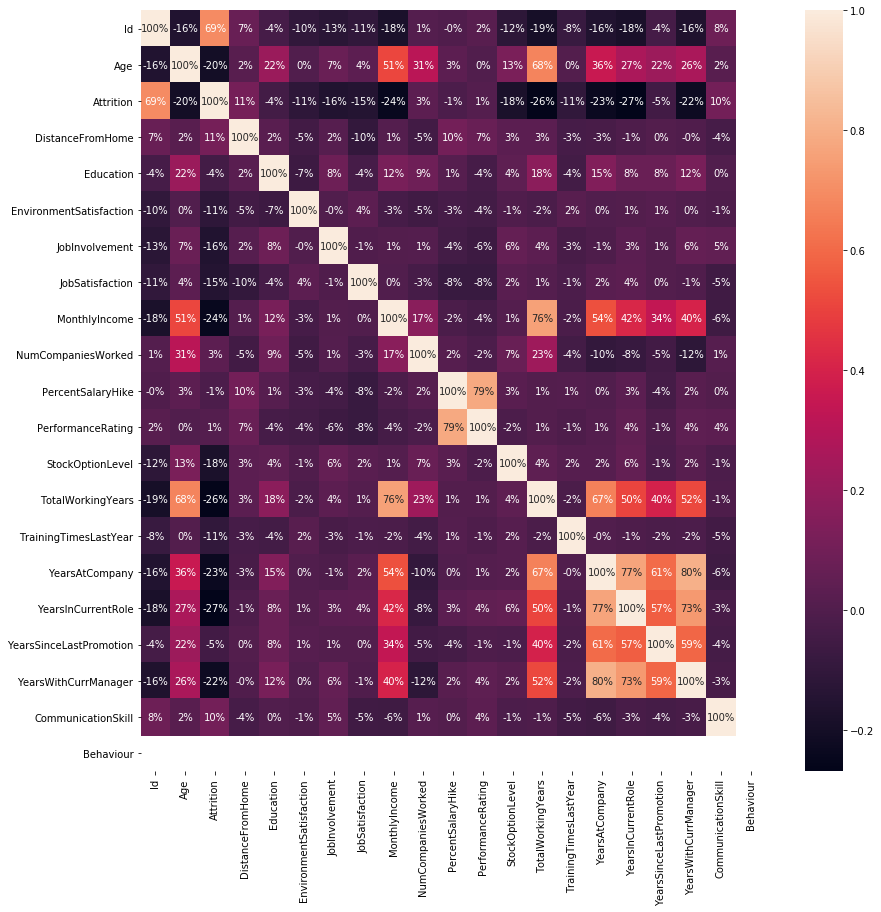

In [21]:
plt.figure(figsize=(14,14))
sns.heatmap(data.corr(), annot=True, fmt='.0%')

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
for col in data.columns:
    if data[col].dtype==np.number:
        continue
    data[col] = LabelEncoder().fit_transform(data[col])

In [24]:
data['Age_Years'] = data['Age']
data=data.drop('Age', axis=1)

In [25]:
data

,Id,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour,Age_Years
0,0,0,0,1,1,2,3,2,0,2,...,0,12,2,11,7,6,7,3,0,12
1,1,0,2,1,11,3,1,2,0,2,...,2,7,2,3,2,1,1,1,0,18
2,2,1,2,2,1,0,3,2,1,2,...,0,12,3,9,7,7,3,4,0,37
3,3,0,2,1,23,0,1,0,1,2,...,0,18,2,7,7,1,7,3,0,21
4,4,0,2,1,2,2,4,2,1,2,...,1,10,2,10,7,7,8,0,0,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1623,1623,1,1,1,18,2,3,2,1,3,...,0,7,2,2,2,2,2,2,0,24
1624,1624,1,2,2,1,0,3,2,1,2,...,0,12,3,9,7,7,3,4,0,37
1625,1625,1,2,2,8,1,1,0,1,1,...,0,6,2,3,2,2,2,4,0,7
1626,1626,1,2,0,12,2,0,0,1,1,...,3,4,3,2,2,2,0,4,0,11


In [26]:
data = data.drop('Id',axis=1)
data

,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour,Age_Years
0,0,0,1,1,2,3,2,0,2,2,...,0,12,2,11,7,6,7,3,0,12
1,0,2,1,11,3,1,2,0,2,4,...,2,7,2,3,2,1,1,1,0,18
2,1,2,2,1,0,3,2,1,2,7,...,0,12,3,9,7,7,3,4,0,37
3,0,2,1,23,0,1,0,1,2,6,...,0,18,2,7,7,1,7,3,0,21
4,0,2,1,2,2,4,2,1,2,4,...,1,10,2,10,7,7,8,0,0,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1623,1,1,1,18,2,3,2,1,3,6,...,0,7,2,2,2,2,2,2,0,24
1624,1,2,2,1,0,3,2,1,2,7,...,0,12,3,9,7,7,3,4,0,37
1625,1,2,2,8,1,1,0,1,1,8,...,0,6,2,3,2,2,2,4,0,7
1626,1,2,0,12,2,0,0,1,1,1,...,3,4,3,2,2,2,0,4,0,11


In [27]:
X = data.iloc[:, 1:data.shape[1]].values
Y = data.iloc[:,0].values

In [28]:
from sklearn.model_selection import train_test_split as tts

In [29]:
X_train,X_test,y_train,y_test=tts(X,Y,test_size=0.25,random_state=1)

In [30]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=1)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)
model.score(X_train,y_train)

0.9991809991809992

In [31]:
model.score(X_test,y_test)

0.9631449631449631

In [32]:
y_pred

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,

In [33]:
for i in range(len(X_test)):
    print("X=%s, Predicted=%s" % (X_test[i], y_pred[i]))

X=[ 0  1 16  2  1  3  1  0  6  2  2 87  2  0  2  0  0  6  3  0  0  0  0  3
  0 26], Predicted=0
X=[ 1  2 11  3  1  1  1  1  8  0  1 30  1  0  7  0  1  1  2  1  0  0  0  3
  0 12], Predicted=1
X=[ 1  2  4  2  2  1  1  2  8  1  2 18  1  1  3  0  0  0  3  0  0  0  0  1
  0  0], Predicted=1
X=[  2   1   1   3   3   2   1   2   6   2   2 397   6   0   6   0   0   5
   3   2   2   2   1   3   0  10], Predicted=1
X=[  2   2   1   2   2   2   0   2   3   0   1 878   8   0  12   1   0  28
   2  26  15  15   9   0   0  28], Predicted=0
X=[  1   1  27   3   5   3   0   1   0   3   1 417   0   0   0   0   3   7
   4   6   5   0   4   1   0  24], Predicted=0
X=[  2   2  12   3   3   1   1   2   7   0   0 374   2   0   6   0   0   9
   2   3   1   1   2   3   0  13], Predicted=1
X=[ 2  1  0  1  1  3  1  1  2  0  1 68  1  0  1  0  1  4  3  4  2  3  2  2
  0 13], Predicted=0
X=[  2   2   1   3   2   2   1   1   7   1   2 746   7   1   1   0   0   7
   3   2   2   2   2   0   0  14], Predicted=1
X=[  2

In [34]:
for i in range(len(X_test)):
    print("X=%s, Predicted=%s" % (X_test[i], y_pred_prob[i]))

X=[ 0  1 16  2  1  3  1  0  6  2  2 87  2  0  2  0  0  6  3  0  0  0  0  3
  0 26], Predicted=[0.8 0.2]
X=[ 1  2 11  3  1  1  1  1  8  0  1 30  1  0  7  0  1  1  2  1  0  0  0  3
  0 12], Predicted=[0. 1.]
X=[ 1  2  4  2  2  1  1  2  8  1  2 18  1  1  3  0  0  0  3  0  0  0  0  1
  0  0], Predicted=[0. 1.]
X=[  2   1   1   3   3   2   1   2   6   2   2 397   6   0   6   0   0   5
   3   2   2   2   1   3   0  10], Predicted=[0.2 0.8]
X=[  2   2   1   2   2   2   0   2   3   0   1 878   8   0  12   1   0  28
   2  26  15  15   9   0   0  28], Predicted=[0.8 0.2]
X=[  1   1  27   3   5   3   0   1   0   3   1 417   0   0   0   0   3   7
   4   6   5   0   4   1   0  24], Predicted=[0.7 0.3]
X=[  2   2  12   3   3   1   1   2   7   0   0 374   2   0   6   0   0   9
   2   3   1   1   2   3   0  13], Predicted=[0.1 0.9]
X=[ 2  1  0  1  1  3  1  1  2  0  1 68  1  0  1  0  1  4  3  4  2  3  2  2
  0 13], Predicted=[0.9 0.1]
X=[  2   2   1   3   2   2   1   1   7   1   2 746   7   1   1   0  

In [35]:
y_pred_prob[:,1]

array([0.2, 1. , 1. , 0.8, 0.2, 0.3, 0.9, 0.1, 1. , 0.3, 1. , 0.2, 0.3,
       0.2, 0. , 0.4, 0.1, 1. , 1. , 1. , 0.2, 0.8, 0.2, 0.1, 0.9, 1. ,
       0.4, 1. , 1. , 0.2, 0.2, 0. , 0.6, 1. , 0.2, 0.5, 1. , 0.7, 0.1,
       0. , 1. , 1. , 0. , 1. , 0.2, 0.9, 0.1, 1. , 1. , 0.7, 0.9, 0.2,
       1. , 0.9, 0.9, 1. , 0.4, 0.4, 0.2, 0.1, 1. , 0.4, 1. , 0.1, 1. ,
       0.9, 0. , 0.1, 1. , 1. , 0.8, 1. , 0.1, 1. , 1. , 1. , 0.2, 1. ,
       1. , 0.9, 0.9, 1. , 0.3, 0.2, 0.4, 1. , 0.8, 0. , 1. , 1. , 0.9,
       0.9, 1. , 0.1, 0.4, 1. , 0.8, 1. , 1. , 0.9, 0.1, 0.9, 1. , 0.2,
       0. , 0. , 0.9, 1. , 0.2, 0.3, 1. , 1. , 0.1, 1. , 1. , 0.2, 0.3,
       0.2, 0.6, 0.9, 0.6, 0.9, 0.2, 0.2, 0.1, 0.3, 0.2, 0.9, 0. , 1. ,
       0.1, 0. , 0.2, 0.9, 0.1, 0.4, 0. , 0.2, 0.2, 0.3, 0.1, 0. , 0.1,
       0.4, 1. , 0. , 1. , 0. , 0.2, 1. , 0.2, 0.2, 1. , 0.1, 0. , 0.9,
       0.1, 0.9, 0.8, 1. , 1. , 1. , 0.1, 1. , 0.9, 0. , 0.1, 1. , 1. ,
       0.2, 1. , 0.2, 0.1, 1. , 1. , 1. , 0. , 0.1, 0. , 0.3, 0.

In [36]:
from numpy import savetxt

In [37]:
answer = y_pred_prob[:,1]

In [38]:
print(answer)

[0.2 1.  1.  0.8 0.2 0.3 0.9 0.1 1.  0.3 1.  0.2 0.3 0.2 0.  0.4 0.1 1.
 1.  1.  0.2 0.8 0.2 0.1 0.9 1.  0.4 1.  1.  0.2 0.2 0.  0.6 1.  0.2 0.5
 1.  0.7 0.1 0.  1.  1.  0.  1.  0.2 0.9 0.1 1.  1.  0.7 0.9 0.2 1.  0.9
 0.9 1.  0.4 0.4 0.2 0.1 1.  0.4 1.  0.1 1.  0.9 0.  0.1 1.  1.  0.8 1.
 0.1 1.  1.  1.  0.2 1.  1.  0.9 0.9 1.  0.3 0.2 0.4 1.  0.8 0.  1.  1.
 0.9 0.9 1.  0.1 0.4 1.  0.8 1.  1.  0.9 0.1 0.9 1.  0.2 0.  0.  0.9 1.
 0.2 0.3 1.  1.  0.1 1.  1.  0.2 0.3 0.2 0.6 0.9 0.6 0.9 0.2 0.2 0.1 0.3
 0.2 0.9 0.  1.  0.1 0.  0.2 0.9 0.1 0.4 0.  0.2 0.2 0.3 0.1 0.  0.1 0.4
 1.  0.  1.  0.  0.2 1.  0.2 0.2 1.  0.1 0.  0.9 0.1 0.9 0.8 1.  1.  1.
 0.1 1.  0.9 0.  0.1 1.  1.  0.2 1.  0.2 0.1 1.  1.  1.  0.  0.1 0.  0.3
 0.9 0.9 0.2 1.  1.  0.1 0.3 1.  1.  0.1 0.9 0.4 1.  0.1 0.2 0.  0.  0.
 1.  1.  0.5 1.  1.  1.  1.  0.  1.  1.  0.9 0.6 1.  0.2 0.9 0.3 0.1 0.4
 0.3 0.  0.3 0.3 1.  1.  0.6 1.  0.3 0.4 1.  0.1 0.9 0.1 0.1 0.  0.  1.
 1.  1.  0.4 1.  0.2 0.9 1.  1.  0.9 0.  0.9 0.5 0.  0.2 0

In [39]:
#savetxt('AnswerFinal.csv',y_pred_prob[:,1], delimiter=' ')

In [40]:
df_test = pd.read_csv("test.csv")

In [41]:
df_test = df_test.drop('EmployeeNumber', axis=1)

In [42]:
df_test.corr()

,Id,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
Id,1.000000,-0.015695,0.063328,0.019506,-0.080095,-0.052992,0.007419,-0.007782,-0.044171,-0.034300,-0.040676,0.024077,-0.029443,0.010936,-0.016004,-0.048900,0.035503,-0.034096,0.013740,NaN
Age,-0.015695,1.000000,-0.053300,0.182022,0.045132,0.014778,-0.026861,0.499099,0.292252,-0.055140,-0.019744,0.024473,0.685664,-0.007476,0.305979,0.210959,0.225758,0.202783,-0.005803,NaN
DistanceFromHome,0.063328,-0.053300,1.000000,0.015501,0.023528,-0.020834,0.126551,-0.060506,-0.040192,-0.021289,0.001866,0.031324,-0.047817,-0.058960,0.055618,0.036956,0.029468,0.014377,-0.006354,NaN
Education,0.019506,0.182022,0.015501,1.000000,0.012203,0.027180,0.025324,0.095244,0.113205,-0.007964,0.001231,0.036781,0.134016,0.012345,0.036193,0.102717,0.084975,0.063178,0.014905,NaN
EnvironmentSatisfaction,-0.080095,0.045132,0.023528,0.012203,1.000000,0.045231,-0.015422,0.016314,0.023961,0.006561,-0.009287,0.005946,0.021033,-0.050614,0.039330,0.062527,0.086784,0.023942,0.012453,NaN
JobInvolvement,-0.052992,0.014778,-0.020834,0.027180,0.045231,1.000000,-0.074475,-0.009591,-0.014985,0.042279,0.058554,0.045129,-0.008598,0.000276,-0.030380,0.004688,-0.063715,0.009564,0.019311,NaN
JobSatisfaction,0.007419,-0.026861,0.126551,0.025324,-0.015422,-0.074475,1.000000,-0.007933,-0.114235,0.094919,0.063872,0.002627,-0.034314,-0.026225,0.055264,0.036415,-0.016031,0.012668,0.024321,NaN
MonthlyIncome,-0.007782,0.499099,-0.060506,0.095244,0.016314,-0.009591,-0.007933,1.000000,0.135765,-0.135338,-0.085212,0.059193,0.793414,0.011583,0.518279,0.349249,0.364332,0.323363,-0.053942,NaN
NumCompaniesWorked,-0.044171,0.292252,-0.040192,0.113205,0.023961,-0.014985,-0.114235,0.135765,1.000000,-0.073978,-0.037215,0.072307,0.250252,-0.003929,-0.135288,-0.107948,-0.034209,-0.109961,-0.031826,NaN
PercentSalaryHike,-0.034300,-0.055140,-0.021289,-0.007964,0.006561,0.042279,0.094919,-0.135338,-0.073978,1.000000,0.766543,-0.051892,-0.119540,0.000117,-0.149965,-0.118841,-0.109495,-0.116942,-0.006353,NaN


In [43]:
for col in df_test.columns:
    if df_test[col].dtype==np.number:
        continue
    df_test[col] = LabelEncoder().fit_transform(df_test[col])

In [ ]:
df_test['Age_Years'] = df_test['Age']
df_test=df_test.drop('Age', axis=1)

In [ ]:
df_test = df_test.drop('Id',axis=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=1)
model.fit(X_train,y_train)
y_pred=model.predict(df_test)
y_pred_prob_test = model.predict_proba(df_test)
model.score(X_train,y_train)

In [ ]:
answer = y_pred_prob_test[:,1]
answer

In [ ]:
len(answer)

In [ ]:
#savetxt('AnswerFinal.csv',y_pred_prob_test[:,1], delimiter=' ')

In [ ]:
df = pd.read_csv("test.csv")

In [ ]:
for col in df.columns:
    if df[col].dtype==np.number:
        continue
    df[col] = LabelEncoder().fit_transform(df[col])

In [ ]:
df = df.drop('EmployeeNumber',axis=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=1)
model.fit(X_train,y_train)
y_pred=model.predict(df)
y_pred_prob_test2 = model.predict_proba(df)
model.score(X_train,y_train)

In [ ]:
y_pred_prob_test2[:,1]

In [ ]:
len(y_pred_prob_test2)

In [ ]:
new_test = df_test.copy()
for col in new_test.columns:
    if(isinstance(df_test[col][0],str)):
        new_test[col] = LabelEncoder().fit_transform(new_test[col])
#new_test = new_test.drop(['Id','EmployeeNumber'],axis = 1)
X_test = new_test
X_test['MonthlyIncome'] = np.cbrt(X_test['MonthlyIncome'])
X_test['TotalWorkingYears'] = np.cbrt(X_test['TotalWorkingYears'])
X_test['YearsAtCompany'] = np.cbrt(X_test['YearsAtCompany'])
X_test['YearsSinceLastPromotion'] = np.cbrt(X_test['YearsSinceLastPromotion'])
X_test['DistanceFromHome'] = np.cbrt(X_test['DistanceFromHome'])

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state = 0,max_features = 24)
rf.fit(X_train,Y_train)
print('For Random Forest Classifier')
score = roc_auc_score(Y_train, rf.predict_proba(X_train)[:,1])
print('Train roc_auc_score:',score)
score = roc_auc_score(Y_test, rf.predict_proba(X_test)[:,1])
print("Test roc_auc_score:",score)

In [ ]:
models = [rf,gbc,dtc,svc,log_reg,mlp]
modelname = ['Random Forest','GradientBoost','DecisionTree','SupportVector','Logistic_reg','MLPClassifier']
for model,name in zip(models,modelname):
    test_prob = model.predict_proba(X_test)[:,1]
    result = pd.DataFrame({'Id':list(test['Id']),'Attrition':list(test_prob)})
    result.to_csv('/kaggle/working/'+str(name)+'.csv',index=False)